## Raw Input Data

The data here is preprocessed from CSVs that looks like this:

| timestamp | displacement  | yaw_rate | acceleration |
| :-------: | :----------: | :------: | :----------: |
| 0.0 | 0 | 0.0 | 0.0 |
| 0.25 | 0.0 | 0.0 | 19.6 |
| 0.5 | 1.225 | 0.0 | 19.6 |
| 0.75 | 3.675 | 0.0 | 19.6 |
| 1.0 | 7.35 | 0.0 | 19.6 |
| 1.25 | 12.25 | 0.0 | 0.0 |
| 1.5 | 17.15 | -2.82901631903 | 0.0 |
| 1.75 | 22.05 | -2.82901631903 | 0.0 |
| 2.0 | 26.95 | -2.82901631903 | 0.0 |
| 2.25 | 31.85 | -2.82901631903 | 0.0 |
| 2.5 | 36.75 | -2.82901631903 | 0.0 |
| 2.75 | 41.65 | -2.82901631903 | 0.0 |
| 3.0 | 46.55 | -2.82901631903 | 0.0 |
| 3.25 | 51.45 | -2.82901631903 | 0.0 |
| 3.5 | 56.35 | -2.82901631903 | 0.0 |

This data is currently saved in a file called `trajectory_example.pickle`. It can be loaded using a helper function:

In [1]:
from helpers import process_data
%matplotlib inline

data_list = process_data("trajectory_example.pickle")

for entry in data_list:
    print(entry)

(0.0, 0, 0.0, 0.0)
(0.25, 0.0, 0.0, 19.600000000000001)
(0.5, 1.2250000000000001, 0.0, 19.600000000000001)
(0.75, 3.6750000000000003, 0.0, 19.600000000000001)
(1.0, 7.3500000000000005, 0.0, 19.600000000000001)
(1.25, 12.25, 0.0, 0.0)
(1.5, 17.149999999999999, -2.8290163190291664, 0.0)
(1.75, 22.049999999999997, -2.8290163190291664, 0.0)
(2.0, 26.949999999999996, -2.8290163190291664, 0.0)
(2.25, 31.849999999999994, -2.8290163190291664, 0.0)
(2.5, 36.749999999999993, -2.8290163190291664, 0.0)
(2.75, 41.649999999999991, -2.8290163190291664, 0.0)
(3.0, 46.54999999999999, -2.8290163190291664, 0.0)
(3.25, 51.449999999999989, -2.8290163190291664, 0.0)
(3.5, 56.349999999999987, -2.8290163190291664, 0.0)


as you can see, each entry in `data_list` contains four fields. Those fields correspond to `timestamp` (seconds), `displacement` (meters), `yaw_rate` (rads / sec), and `acceleration` (m/s/s).


Contained in the data above is all the information you need to reconstruct a fairly complex vehicle trajectory. After processing **this** exact data, it's possible to generate this plot of the vehicle's X and Y position:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3044ac_example-trajectory/example-trajectory.png)

as you can see, this vehicle first accelerates forwards and then turns right until it almost completes a full circle turn.

### Data Explained

**`timestamp`** - Timestamps are all measured in seconds. The time between successive timestamps ($\Delta t$) will always be the same *within* a trajectory's data set (but not *between* data sets).

**`displacement`** - Displacement data from the odometer is in meters and gives the **total** distance traveled up to this point.

**`yaw_rate`** - Yaw rate is measured in radians per second with the convention that positive yaw corresponds to *counter-clockwise* rotation. 

**`acceleration`** - Acceleration is measured in $\frac{m/s}{s}$ and is always **in the direction of motion of the vehicle** (forward). 



* `get_speeds` - returns a length $N$ list where entry $i$ contains the speed ($m/s$) of the vehicle at $t = i \times \Delta t$ 

* `get_headings` - returns a length $N$ list where entry $i$ contains the heading (radians, $0 \leq \theta < 2\pi$) of the vehicle at $t = i \times \Delta t$

* `get_x_y` - returns a length $N$ list where entry $i$ contains an `(x, y)` tuple corresponding to the $x$ and $y$ coordinates (meters) of the vehicle at $t = i \times \Delta t$ 

* `show_x_y` - generates an x vs. y scatter plot of vehicle positions. 

**How do you make those cool arrows?!**

I did a Google search for "python plot grid of arrows" and the second result led me to some [demonstration code](https://matplotlib.org/examples/pylab_examples/quiver_demo.html) that was really helpful. 

## Testing Correctness
Testing code is provided at the bottom of this notebook. Note that only `get_speeds`, `get_x_y`, and `get_headings` are tested automatically. You will have to "test" your `show_x_y` function by manually comparing your plots to the expected plots. 

### Initial Vehicle State

The vehicle always begins with all state variables equal to zero. This means `x`, `y`, `theta` (heading), `speed`, `yaw_rate`, and `acceleration` are 0 at t=0.

----

In [4]:
from math import sqrt, pi, cos, sin
import numpy as np
import matplotlib.pyplot as plt
def get_speeds(data_list):
    speed = 0.0
    speeds = []
    prev_time = data_list[0][0]
    for i in range(len(data_list)):
        (time, dis, yaw, acc) = data_list[i]
        dt = time - prev_time
        speed += acc*dt
        speeds.append(speed)
        prev_time = time
    return speeds

def get_headings(data_list):
    headings = []
    ans = 0.0
    prev_time = data_list[0][0]
    for i in range(len(data_list)):
        (time, dis, yaw, acc) = data_list[i]
        dt = time - prev_time
        ans += yaw*dt % (2*pi)
        headings.append(ans)
        prev_time = time
    return headings

def get_x_y(data_list):
    X_Y = []
    x=0.0
    y=0.0
    thetas = get_headings(data_list)
    speeds = get_speeds(data_list)
    prev_time = data_list[0][0]
    for i in range(len(data_list)):
        (time, dis, yaw, acc) = data_list[i]
        dt = time - prev_time
        x += speeds[i]*dt * cos(thetas[i])
        y += speeds[i]*dt * sin(thetas[i])
        X_Y.append((x,y))
        prev_time = time
    return X_Y

def show_x_y(data_list, increment=1):
    XY = get_x_y(data_list)
    headings = get_headings(data_list)
    X  = [d[0] for d in XY]
    Y  = [d[1] for d in XY]
    h_x = np.cos(headings)
    h_y = np.sin(headings)
    Q = plt.quiver(X[::increment],
                   Y[::increment],
                   h_x[::increment],
                   h_y[::increment],
                   units='x',
                   pivot='tip')
    qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$1 \frac{m}{s}',
                       labelpos='E', coordinates='figure')
    plt.show()

## Testing
Testing my functions by running the cell.

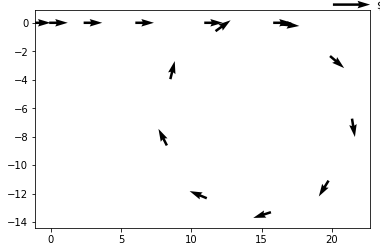

In [5]:
show_x_y(data_list)

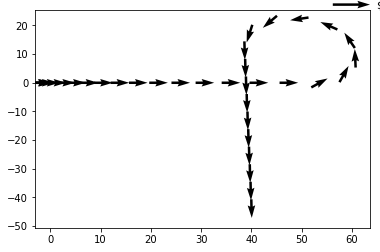

In [16]:
circle_data = process_data("trajectory_1.pickle")
show_x_y(circle_data,increment=10)

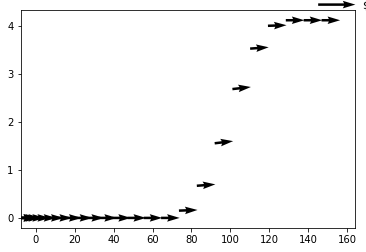

In [9]:
merge_data = process_data("trajectory_2.pickle")
show_x_y(merge_data,increment=10)

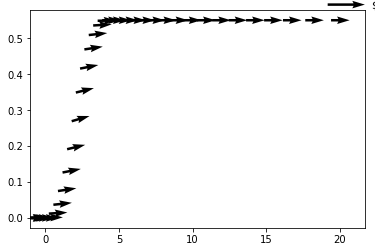

In [15]:
parallel_park = process_data("trajectory_3.pickle")
show_x_y(parallel_park,increment=5)